In [2]:
from mss import mss
import pydirectinput
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import time
from gym import Env
from gym.spaces import Box, Discrete

In [246]:
class Game(Env):
    def __init__(self):
        super().__init__()

        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        self.action_space = Discrete(4) # up, down, forward, nothing

        self.cap = mss()
        self.game_location = {'top':130, 'left':45, 'width':1830, 'height':700}
        self.done_location = {'top':130, 'left':720, 'width':500, 'height':200}
    def step(self, action):
        # action key - 0 = No action, 1 = Forward, 2 = Up, 3 = Down
        pass
    def render(self):
        pass
    def reset(self):
        pass
    def close(self):
        pass
    def get_observation(self):
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3]

        return raw
    def get_done(self):
        done_cap = np.array(self.cap.grab(self.done_location))[:,:,:3]
        
        done_strings = ['You', 'win']

        done = False
        res = pytesseract.image_to_string(done_cap)[:4]
        
        if res in done_strings:
            done = True

        return done, done_cap

In [242]:
env = Game()

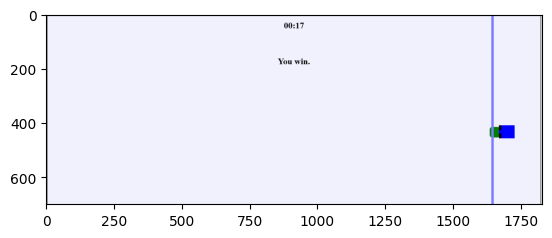

In [243]:
plt.imshow(env.get_observation())

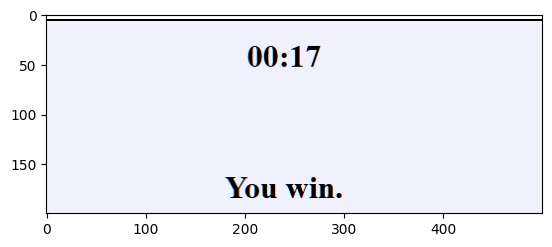

In [244]:
plt.imshow(env.get_done())

In [69]:
env.get_observation().shape

(700, 1000, 3)

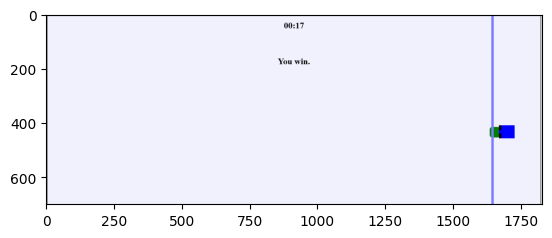

In [245]:
plt.imshow(env.get_observation())

In [24]:
env.action_space.sample()

1

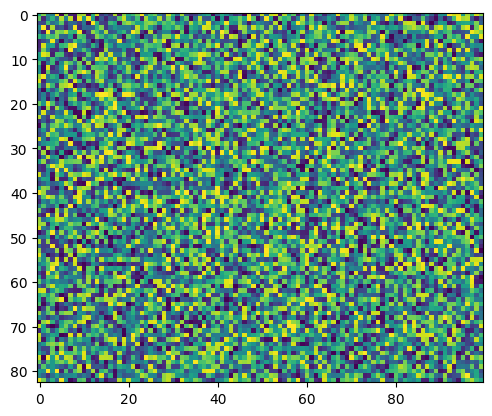

In [25]:
plt.imshow(env.observation_space.sample()[0])